In [3]:
import sys
IN_COLAB = 'google.colab' in sys.modules

<table align="left">
  <td>
    <a target="_blank" 
        href="https://colab.research.google.com/github/evan-burke/m3_sf_2020_training/blob/master/how_ml_works.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

-----
# A machine can have a little learning, as a treat.
 

In [593]:
from dataclasses import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import time
from IPython.display import Image, display # HTML

if IN_COLAB:
    from IPython.display import HTML
else:
    from IPython.display import Video
    try:
        import sklearn
    except:
        !{sys.executable} -m pip install scikit-learn

In [71]:
import matplotlib.style as style
style.use('fivethirtyeight')
FIGSIZE = (13,8)

In [72]:
# Generate some random points

np.random.seed(23580918)
x = np.random.rand(100, 1) * 10
noise = (np.random.randn(100, 1) + 0.7) * 0.5
Y_INTERCEPT = 1.3
SLOPE = 0.3
AVG_NOISE = np.mean(noise)
y = Y_INTERCEPT + SLOPE * x + noise

xmin = 0
xmax = 10
ymin = 0 
ymax = 6

In [272]:
def gen_random_line():
    # Generate a line with random slope and y-intercept, within a certain range
    y_intercept_range = (0.3, 3)
    slope_range = (0, 0.5)
    
    y_intercept = random.uniform(*y_intercept_range)
    slope = random.uniform(*slope_range)
    
    if slope <= -0.05 and y_intercept <0.1:
        # regenerate
        y_intercept, slope = gen_random_line()
            
    return y_intercept, slope


def compare_approx(x, y, threshold):
    if abs(x - y) < threshold:
        return True
    else:
        return False
    
def gen(chosen_vars):
    # Function to generate some lines, while ensuring no two lines are too similar in slope or y-intercept
    if chosen_vars is None:
        return gen_random_line()
    else:
        testvals = gen_random_line()
        for i in chosen_vars:
            if compare_approx(i.y_intercept, testvals[0], 0.3):
                if compare_approx(i.slope, testvals[1], 0.3):
                    # regenerate, recursively
                    return gen(chosen_vars)
        return testvals
    

In [273]:
@dataclass
class Line:
    color: str
    y_intercept: float
    slope: float
    cost: float = None          # MSE
    improvement: float = None   # During training, change in MSE from the previous step.

In [580]:
# A line such as what we might choose by eyeballing the data.
RED = Line(color='r',
           y_intercept = Y_INTERCEPT + AVG_NOISE,
           slope = SLOPE - 0.03
          )

In [276]:
colors = ['b','g','r','c','m','y','k']
colormap = {'b':'blue',
            'g':'green',
            'r':'red',
            'c':'cyan',
            'm':'magenta',
            'y':'yellow',
            'k':'black'
           }
inverse_colormap = {}
for i in colormap:
    inverse_colormap[colormap[i]] = i

In [277]:
def plot_points(red=False, random_lines=None, lines=None, savefile=None):
    # Plot points defined in globals 'x' and 'y',
    # and optionally plot lines over them and/or save resulting graph as an image.
    
    # 'red' is a boolean; will print a red line over points if 1
    # 'random_lines': bool, generate and display random lines
    # 'lines': list
    
    # NOTE: relies on globals for vars x, y, colors
    
    _colors = random.sample(colors, len(colors))
    
    #compare_threshold = 0
    
    plt.figure(figsize=FIGSIZE)
    plt.scatter(x,y,s=55)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis((-0.03, 10.1, -0.03, 6)) #xmin, xmax, ymin, ymax
    
    if lines is not None:
        for i in lines:
            if i.color in inverse_colormap:
                color = inverse_colormap[i.color]
            else:
                color = i.color
            plt.plot(x, i.y_intercept + i.slope * x, color)

    chosen_vars = []
    if random_lines is not None:
        if random_lines > 7:
            random_lines = 7
            
        for i in range(random_lines):
            rl = gen(chosen_vars)
            randcolor = colors[i]
            chosen_vars.append(Line(colormap[randcolor], rl[0], rl[1]))
            plt.plot(x, rl[0] + rl[1] * x, randcolor)
    
    if red:
        plt.plot(x, RED.y_intercept + (RED.slope * x), RED.color)

    if savefile:
        plt.savefig(savefile)
        plt.close()
    else:
        plt.show()
    if chosen_vars:
        return chosen_vars

### Ok! We've got some data points. Let's look at them.

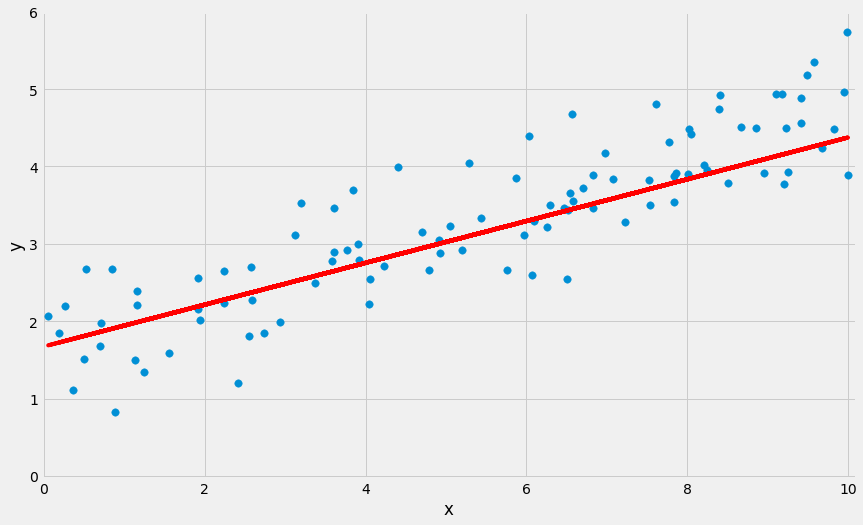

In [581]:
plot_points(1)

#### But software can't "see" the general shape in the same way we can.
#### It's more like this:

In [223]:
for i in range(50):
    print(x[i][0], y[i][0], sep="  \t")

9.824886792952027  	4.48920429201274
7.614293563673678  	4.802287378934495
6.978674980129168  	4.173454446748772
1.936041598735947  	2.0136530530756027
4.914338089223151  	3.052892131775596
9.989118582079097  	5.73969268387858
8.6679166394225  	4.507610919693362
6.099541474491854  	3.2973492968744202
6.833857182160652  	3.4666885433456596
3.6114497059205295  	2.8898412352428022
6.565332786261937  	4.678661461023332
9.422695762706736  	4.560874255654454
4.9208568809557995  	2.8775302833850733
9.201495353176144  	3.7743960971861537
6.5427038362258605  	3.6544958709079225
6.708138638571142  	3.720400281957546
7.543219731173149  	3.5049766128657773
8.053341337475771  	4.423364411638097
8.0107316584253  	3.9085177439656533
8.856036117658483  	4.496819519655672
9.573759826009857  	5.344513513714544
9.949238135741451  	4.957982160271245
5.869402897262168  	3.8563134023279195
8.245636960680413  	3.9581734962694908
9.674058181171876  	4.244427029094174
8.206366299502733  	4.023505819638344
1.15

Now, how might we write software try to approximate this process?
We could start generating lines at random and seeing how well they fit the data.

Which one looks best? Worst?

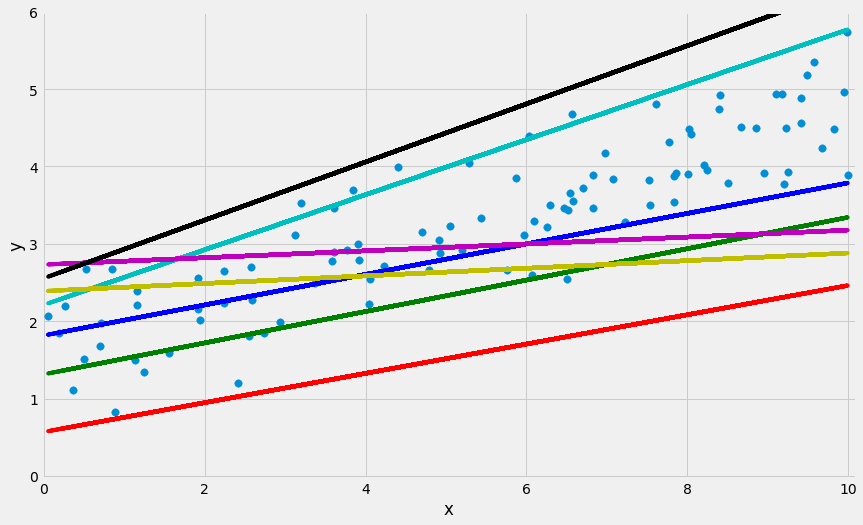

In [225]:
random_lines = plot_points(0, 8)

If we want to figure out which one is closest, we need to have a way to score each of these lines.

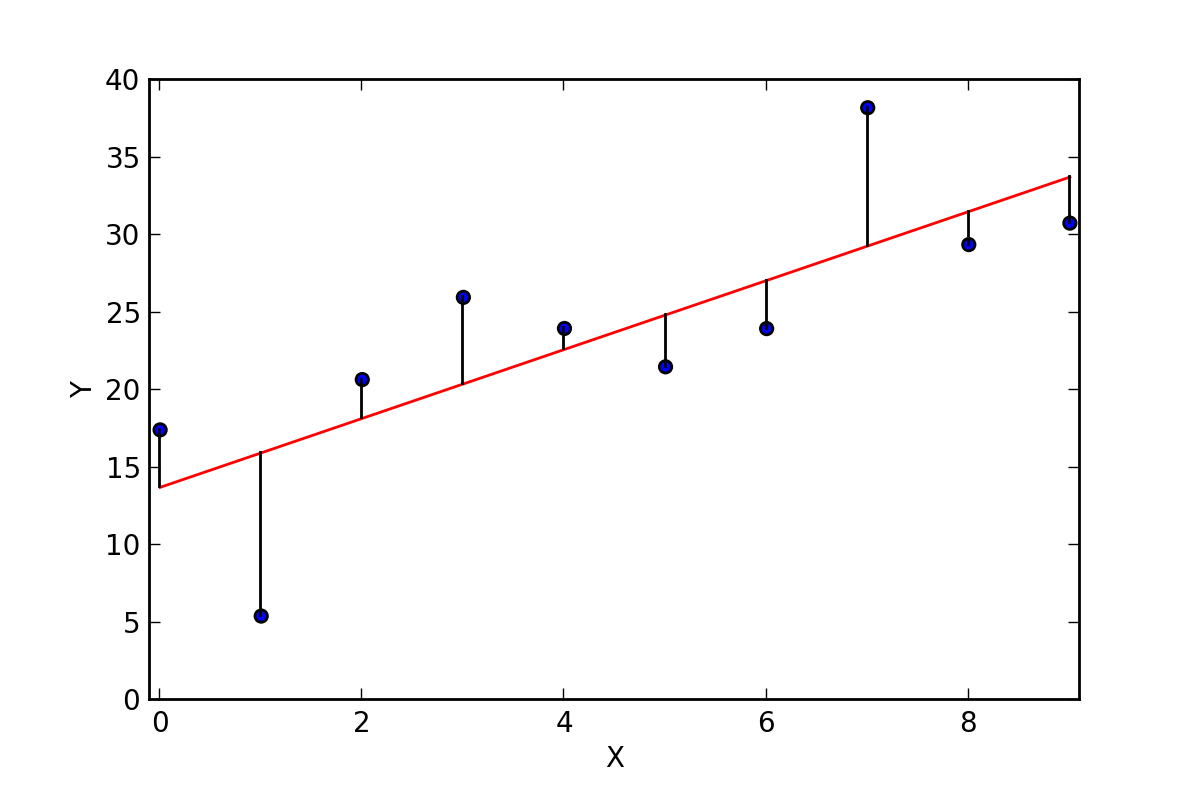

In [82]:
display(Image("https://iai-images.s3-us-west-2.amazonaws.com/m3_sf_2020/fit_errors.png"))

In [170]:
def line_equation(yi, slope, x):
    return yi + slope * x

def score(line):
    # Score the line using MSE
    # uses globals x, y
    y_predict = []
    for i in x:
        y_predict.append(line_equation(line.y_intercept, line.slope, i))
    residuals = y_predict - y

    # can't recall why I'm dividing by 2x the number of samples, but the scaling is uniform so ¯\_(ツ)_/¯
    cost = np.sum((residuals ** 2)) / (2 * x.shape[0])
    return cost

def score_lines(lines):
    for n, i in enumerate(lines):
        cost = score(i)
        lines[n].cost = round(cost,2) 
    scores = sorted(lines, key=lambda i: i.cost)
    
    return scores, pd.DataFrame([asdict(i) for i in scores])

In [282]:
# score our red line from the first chart
RED.score = score(RED)

# score our random lines
line_scores, df = score_lines(random_lines)
df.index = df['color']

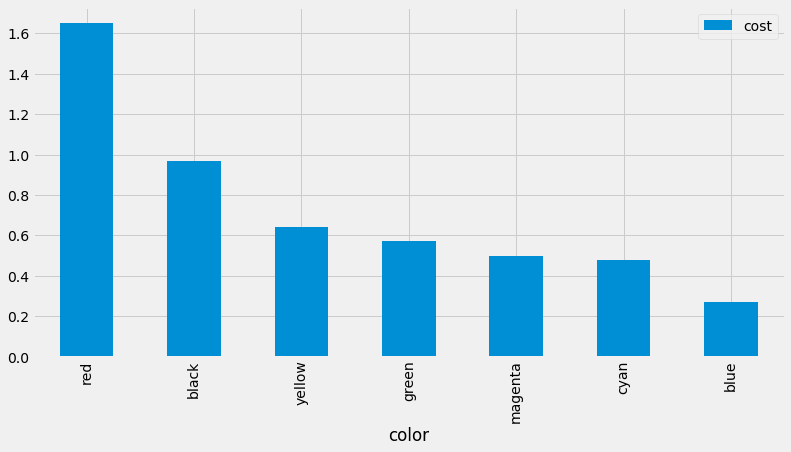

In [283]:
# Chart costs
bar_chart = df[['color','cost']].sort_values('cost', ascending=False).plot(kind="bar", figsize=(12,6))

In [173]:
# Show raw cost numbers
df[['color','cost']]

,color,cost
color,,
yellow,yellow,0.25
green,green,0.28
cyan,cyan,0.47
red,red,1.15
blue,blue,1.99
magenta,magenta,2.21
black,black,3.64


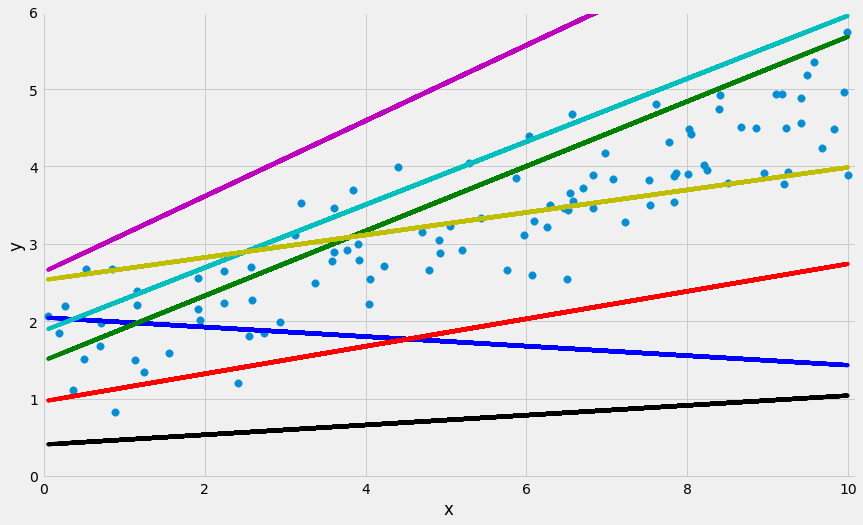

In [97]:
plot_points(lines=random_lines)

## A brief digression...

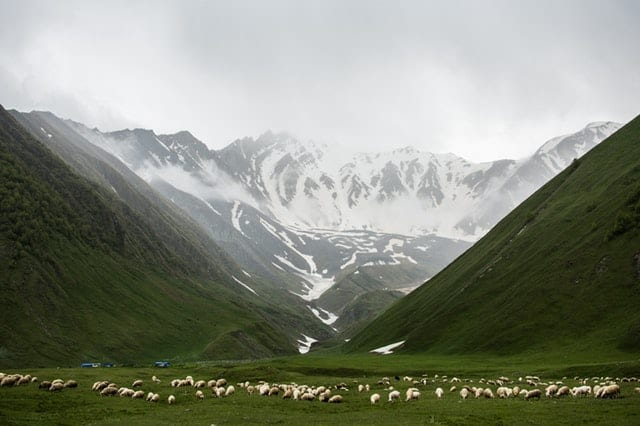

In [60]:
display(Image("https://iai-images.s3-us-west-2.amazonaws.com/m3_sf_2020/grass-field-near-mountains-valley.jpg", width=900))

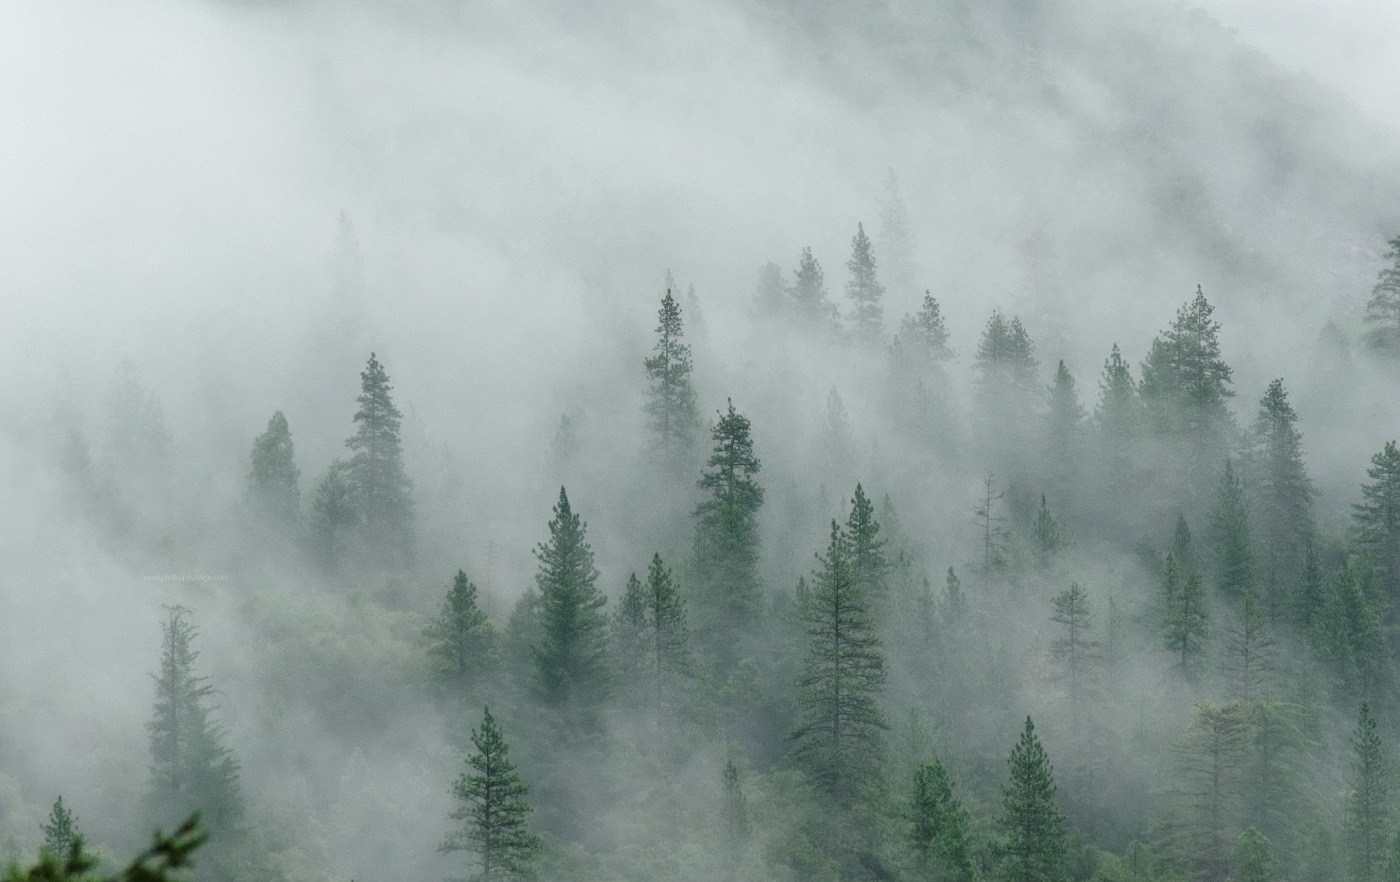

In [58]:
display(Image("https://iai-images.s3-us-west-2.amazonaws.com/m3_sf_2020/fog.jpg", width=900))

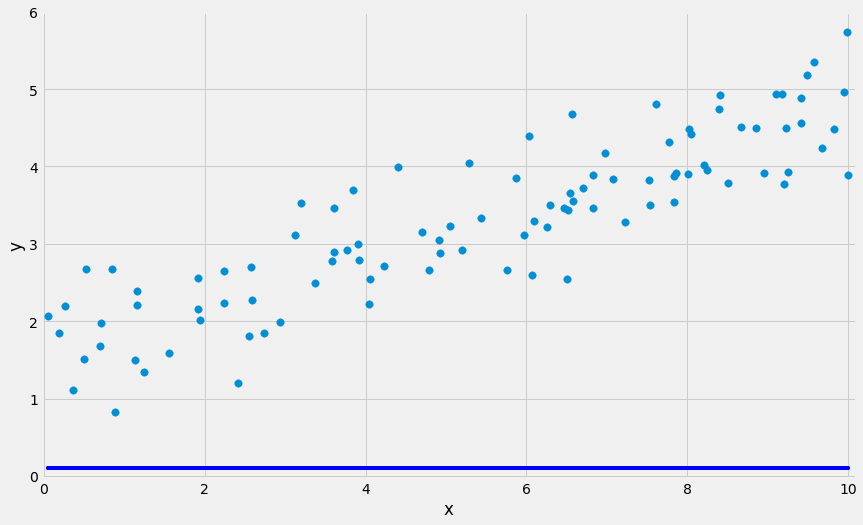

In [346]:
boring_line = Line('blue', 0.1, 0)
#plot_points()
plot_points(lines=[boring_line])

In [455]:
def show_cost(Line):
    if not Line.cost:
        Line.cost = score(Line)
    if Line.cost > 1:
        dec_places = 2
    elif Line.cost > 0.15:
        dec_places = 3
    elif Line.cost > 0.1265:
        dec_places = 4
    else:
        dec_places = 5
        
    print("cost:", round(Line.cost, dec_places), "\n")

In [347]:
boring_line.improvement

In [424]:
def gradient_descent(starting_line, learning_rate, iterations,
                     new_color='cyan',
                     sleep=None,
                     verbose=False,
                     stopping_min_improvement=None):
    
    yi = starting_line.y_intercept
    s = starting_line.slope
    n = int(len(x))
    all_lines = []
    
    if not starting_line.cost:
        starting_line.cost = score(starting_line)
    if 'improvement' not in dir(starting_line) or not starting_line.improvement:
        starting_line.improvement = 0
    all_lines.append(starting_line)
        
    if verbose:
        if iterations < 10:
            echo_every_x_iters = 1
        else:
            echo_every_x_iters = int(iterations/10)
    
    for i in range(iterations): 
        y_pred = s*x + yi  # Output of this line's function for this x value
        D_s = (-2/n) * sum(x * (y - y_pred))
        D_yi = (-2/n) * sum(y - y_pred) 
        s = s - learning_rate * D_s  # Update slope
        yi = yi - learning_rate * D_yi  # Update y-intercept
        
        iter_line = Line(color=starting_line.color, y_intercept=yi, slope=s)
        iter_line.cost = score(iter_line)
        
        # calculate the change in score (improvement) from prev value
        # note the output 'all_lines' list starts with a value in it before looping, so no need to do [i-1]
        iter_line.improvement = all_lines[i].cost - iter_line.cost
        
        all_lines.append(iter_line)
        
        if verbose:
            if (i+1) % echo_every_x_iters == 0:
                
                if iter_line.cost > 0.5:
                    round_digits = 2
                else:
                    round_digits = 3

                print(f"after {i+1} iterations:\t{round(iter_line.cost, round_digits)}")
                if sleep:
                    time.sleep(sleep)
        
        # Early stopping based on reaching a threshold for minimum score delta vs prev iteration.
        # suggested values 
        if stopping_min_improvement is not None:
            if iter_line.improvement < stopping_min_improvement:
                print(f"Early stopping triggered after {i} iterations\n")
                break
    
    final_line = Line(color=new_color, y_intercept=yi, slope=s)

    return final_line, all_lines

### MACHINES, I HEREBY ORDER YOU TO LEARN:

In [517]:
learning_rate = 0.00025  # Learning rate
iterations = 25  # The number of iterations of gradient descent to do

print("\nStarting values for this line:")
show_cost(boring_line)

trained_20, training_trend_20 = gradient_descent(boring_line, 
                           learning_rate=learning_rate,
                           iterations=iterations, 
                           new_color='cyan',
                           sleep=0.21,
                           verbose=True)

print("\nFinal values for this line:")
show_cost(trained_20)


Starting values for this line:
cost: 5.66 

after 2 iterations:	5.26
after 4 iterations:	4.89
after 6 iterations:	4.55
after 8 iterations:	4.24
after 10 iterations:	3.95
after 12 iterations:	3.68
after 14 iterations:	3.43
after 16 iterations:	3.2
after 18 iterations:	2.99
after 20 iterations:	2.79
after 22 iterations:	2.61
after 24 iterations:	2.44

Final values for this line:
cost: 2.36 



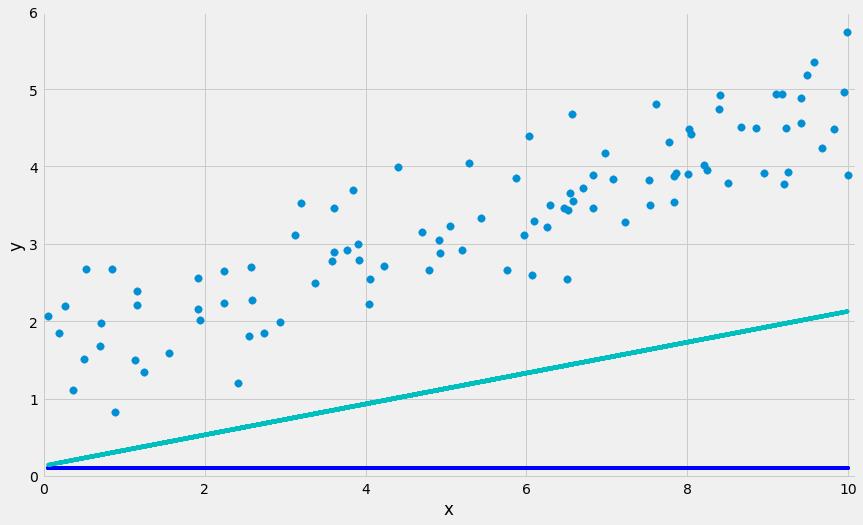

In [357]:
plot_points(lines=[boring_line, trained_20])

### TIME FOR MORE LEARNING

In [307]:
iterations = 100

print("\nStarting values for this line:")
show_cost(boring_line)

trained_100, training_trend_100 = gradient_descent(boring_line,
                               learning_rate=learning_rate,
                               iterations=iterations,
                               new_color='green',
                               verbose=True)


Starting values for this line:
cost: 5.66 

after 10 iterations: 3.95
after 20 iterations: 2.79
after 30 iterations: 2.0
after 40 iterations: 1.47
after 50 iterations: 1.11
after 60 iterations: 0.87
after 70 iterations: 0.7
after 80 iterations: 0.59
after 90 iterations: 0.51
after 100 iterations: 0.459


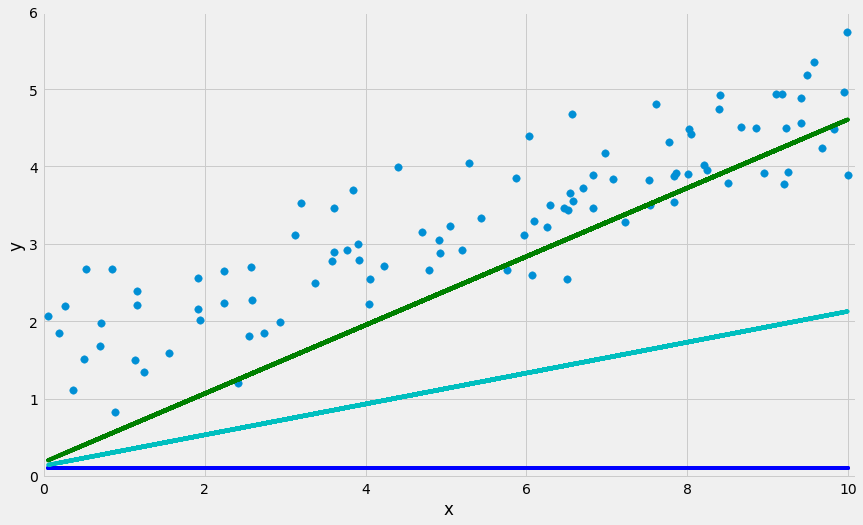

In [358]:
plot_points(lines=[boring_line, trained_20, trained_100])

We can watch how the line moves to fit better over the course of training too:

In [594]:
# Import pre-rendered video
#video_path = "img/train100.mp4"
video_path = "https://iai-images.s3-us-west-2.amazonaws.com/m3_sf_2020/train100.mp4"

if IN_COLAB:
    display(HTML("""
    <video width=1000 controls>
          <source src="%s" type="video/mp4">
    </video>
    """ % video_path))

else:
    display(Video(video_path))

We can also look at how the cost changes during training:

In [361]:
def plot_trend(training_trend, plot_value='cost'):
    # plot_value is what we'll be plotting; this can be 'cost' or 'improvement'
    if plot_value == 'cost':
        values = [i.cost for i in training_trend]
    elif plot_value == 'improvement':
        # 0-index has no improvement; skip it
        values = [i.improvement for i in training_trend if 'improvement' in dir(i) and i.improvement > 0]
    else:
        print(f"error: unsupported input for 'plot_value': {plot_value}")
        return None
    
    plt.figure(figsize=FIGSIZE)
    plt.xlabel('iterations')
    plt.ylabel(plot_value)
    plt.plot(values)
    plt.axis((None, None, -0.02, max(values) + 0.1)) #xmin, xmax, ymin, ymax
    plt.show()

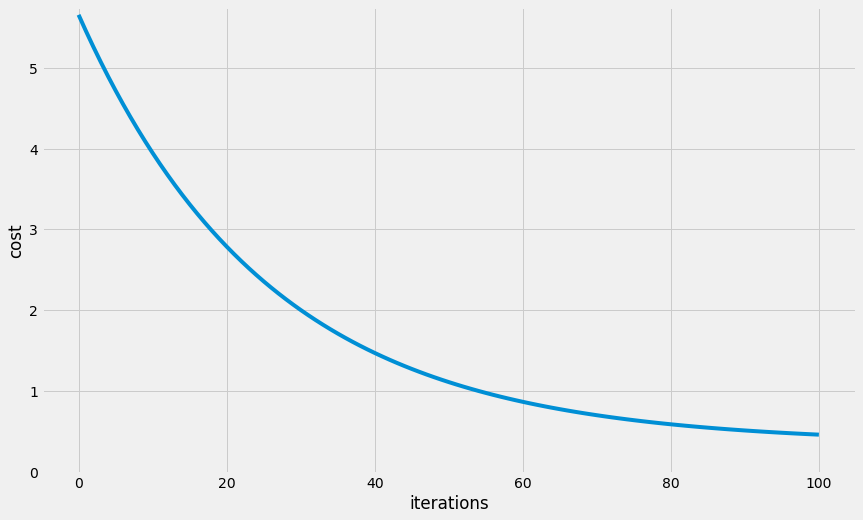

In [375]:
plot_trend(training_trend_100[0:], plot_value='cost')
#plot_trend(training_trend_100[0:], plot_value='improvement')

In [370]:
[i.improvement for i in training_trend_100[-5:]]

[0.0050593547072761424,
 0.004868045711075741,
 0.004684043171295782,
 0.004507068023824556,
 0.004336851863180502]

### WHAT IF WE WENT TOTALLY CRAZY WITH LEARNING?
### JUST SO MUCH LEARNING THERE SHOULD BE A LAW AGAINST IT?

In [401]:
iterations = 1000

print("\nStarting values for this line:")
show_cost(boring_line)

trained_1000, training_trend_1000 = gradient_descent(boring_line,
                               learning_rate=learning_rate,
                               iterations=iterations,
                               new_color='orange')

print("\nFinal values for this line:")
show_cost(trained_1000)


Starting values for this line:
cost: 5.66 


Final values for this line:
cost: 0.185 



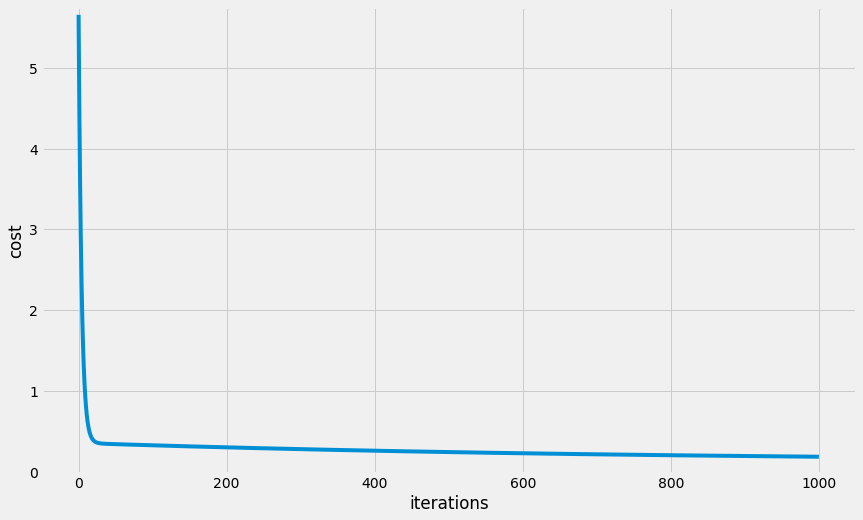

In [591]:
plot_trend(training_trend_1000[0:], plot_value='cost')

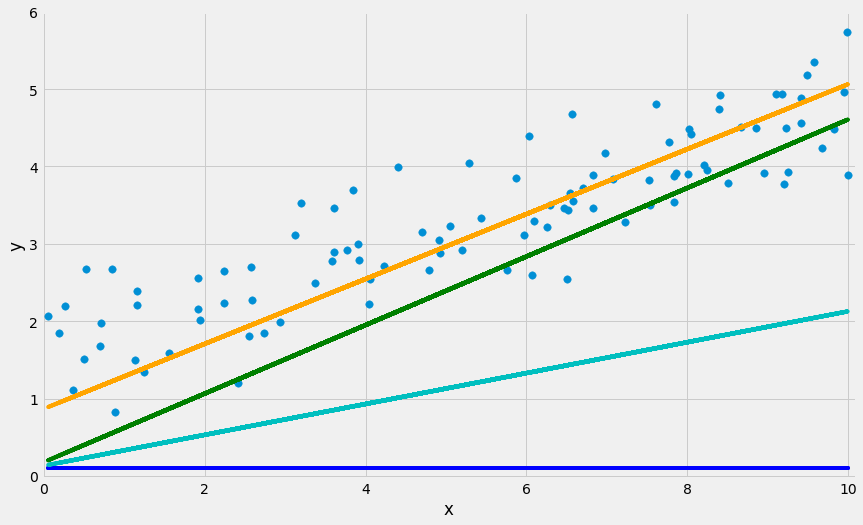

In [403]:
plot_points(lines=[boring_line, trained_20, trained_100, trained_1000])

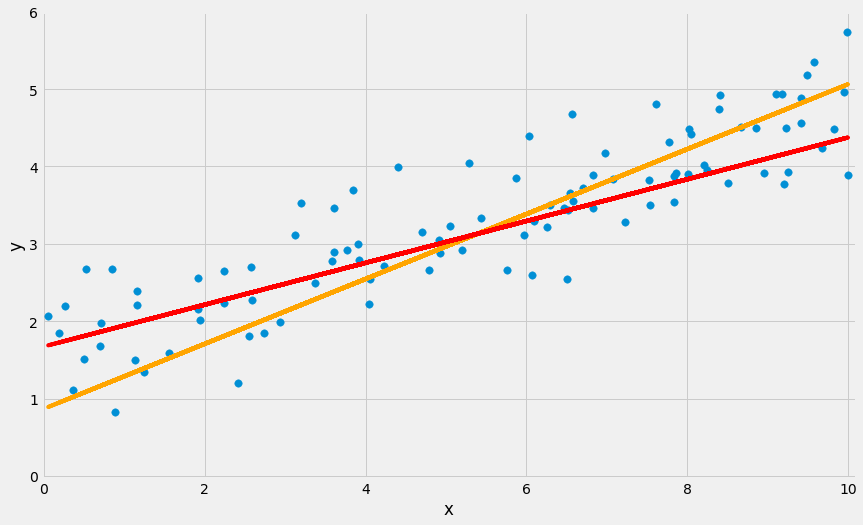

In [582]:
plot_points(lines=[trained_1000, RED])

In [588]:
print("Trained ", end="")
show_cost(trained_1000)
print("Red", end="\t")
show_cost(RED)

Trained cost: 0.185 

Red	cost: 0.1489 



In [475]:
# orig learning rate was:
# learning_rate = 0.00025
_learning_rate = 0.005
iterations = 10000

#stop_value = 1.0e-07

print("\nStarting values for this line:")
show_cost(boring_line)

%time trained_final, trend_final = gradient_descent(boring_line, \
                           learning_rate=_learning_rate, \
                           iterations=iterations, \
                           new_color='orange', \
                           stopping_min_improvement = None)
#learn()

print("\nFinal values for this line:")
show_cost(trained_final)


Starting values for this line:
cost: 5.66 

CPU times: user 3.05 s, sys: 30.1 ms, total: 3.08 s
Wall time: 3.03 s

Final values for this line:
cost: 0.12629 



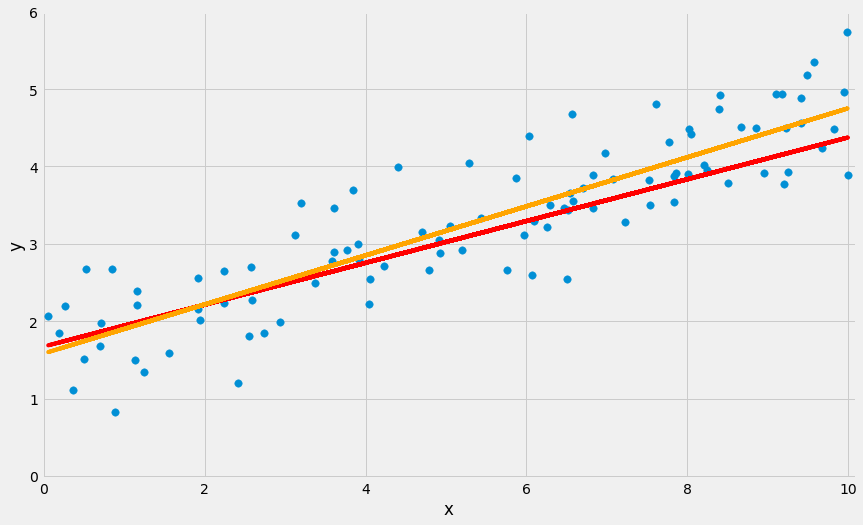

In [587]:
plot_points(lines=[RED, trained_final])

In [589]:
print("Trained final ", end="")
show_cost(trained_final)
print("Red", end="\t")
show_cost(RED)

Trained final cost: 0.12629 

Red	cost: 0.1489 



## Now let's see how this looks in one of the most popular machine learning libraries, skikit-learn

In [566]:
from sklearn import linear_model

In [567]:
regression = linear_model.LinearRegression()

In [ ]:
%%time
# This is the acutal 'learning' step that took us up to a few seconds earlier.
_ = regression.fit(x, y)

In [571]:
predictions = regression.predict(x)
sk_line = Line(color='black',
               y_intercept=regression.intercept_, 
               slope=regression.coef_[0]
              )
sk_line.cost = score(sk_line)

Line(color='black', y_intercept=array([1.58432884]), slope=array([0.31669069]), cost=0.12629011882793076, improvement=None)

In [468]:
def show_line_values(line, name):
    
    print(f'{name} predicted slope:', round(line.slope[0], 3), sep="\t")
    print(f'{name} predicted y-intercept:', round(line.y_intercept[0], 3), sep="\t")
    print(name, end=" predicted ")
    show_cost(line)

In [478]:
show_line_values(sk_line, 'sklearn')

sklearn predicted slope:	0.317
sklearn predicted y-intercept:	1.584
sklearn predicted cost: 0.12629 



In [477]:
show_line_values(trained_final, 'Our code')

Our code predicted slope:	0.317
Our code predicted y-intercept:	1.584
Our code predicted cost: 0.12629 



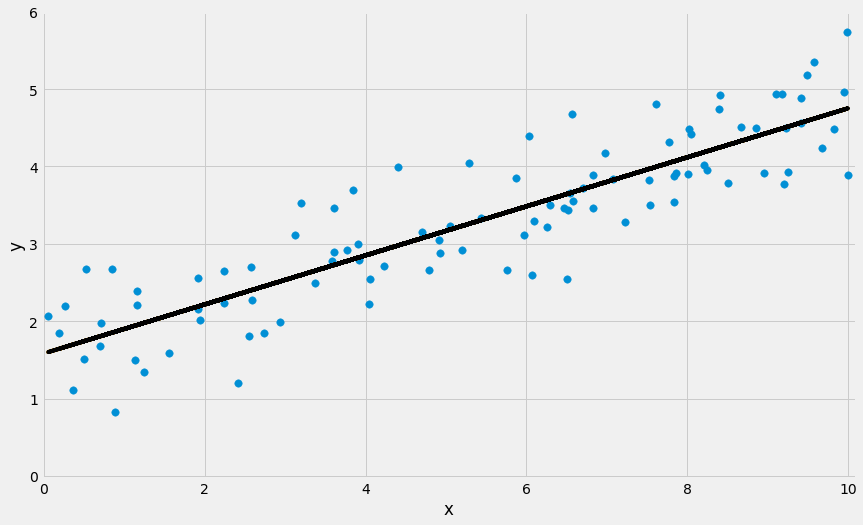

In [562]:
# Black line is scikit-learn; orange line is our code

lines = [sk_line, trained_final]
#lines = [trained_final, sk_line]

plot_points(lines=lines)

In [ ]:
# Let's try training, starting from each of our original random lines. here they are for a refresher:

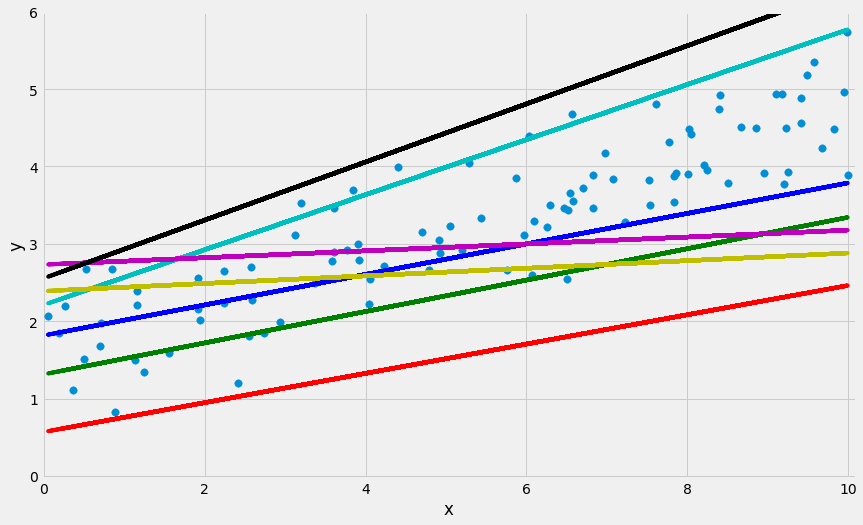

In [524]:
plot_points(lines=random_lines)

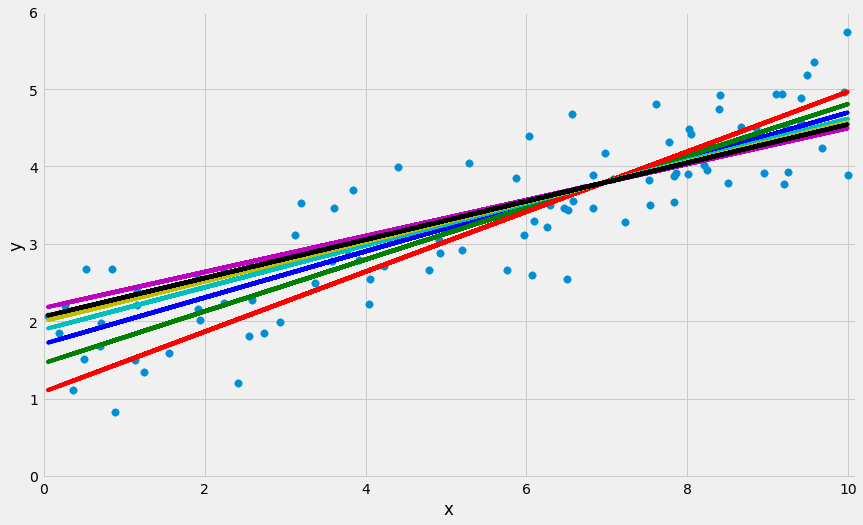

In [597]:
lines_trained = []
iterations = 100
#learning_rate = 0.015
for i in random_lines:
    #print(i)
    trained_line, trend = gradient_descent(starting_line=i, new_color=i.color, learning_rate=learning_rate, iterations=iterations)
    trained_line.cost = score(trained_line)
    #print(trained_line)
    lines_trained.append(trained_line)
    
plot_points(lines=lines_trained)

### Appendix

In [632]:

# Export to png for animation.
# Watch out, generates lots of files.

import math

def export_pngs(trend, sample_every=None):
    
    def export(line, incr):
        savefile = "train_{:05}.png".format(incr)
        plot_points(lines=[i], savefile=savefile)
        
    
    itercount = 0
    for n, i in enumerate(trend):
        # ffmpeg requires no gaps in image numbering sequence, so use 'itercount' var if sampling, rather than enumerating the list
        if sample_every:
            # export only once every N epochs
            if n % sample_every == 0:
                export(i, itercount)
                print(itercount, end=", ")
                itercount += 1
                
                # sample on a curve, slowing down over time
                if itercount > 12 and itercount % 7 == 0:

                    sample_every += math.floor(math.log(itercount-10, 6))
                    
                    print(f"sample every: {sample_every}")
            
        else:
            # export all epochs
            export(i, itercount)
            itercount += 1
            if n % 5 == 0:
                print(itercount, end=", ")

    print()

# Uncomment to export:
#export_pngs(training_trend_100) #, sample_every=7)

#export_pngs(trend_final[0:1500], sample_every=1)

## Then stitch to video with ffmpeg on the command line:
## ffmpeg -framerate 20 -i train_%05d.png train100.mp4



0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, sample every: 1
14, 15, 16, 17, 18, 19, 20, sample every: 2
21, 22, 23, 24, 25, 26, 27, sample every: 3
28, 29, 30, 31, 32, 33, 34, sample every: 4
35, 36, 37, 38, 39, 40, 41, sample every: 5
42, 43, 44, 45, 46, 47, 48, sample every: 7
49, 50, 51, 52, 53, 54, 55, sample every: 9
56, 57, 58, 59, 60, 61, 62, sample every: 11
63, 64, 65, 66, 67, 68, 69, sample every: 13
70, 71, 72, 73, 74, 75, 76, sample every: 15
77, 78, 79, 80, 81, 82, 83, sample every: 17
84, 85, 86, 87, 88, 89, 90, sample every: 19
91, 92, 93, 94, 95, 96, 97, sample every: 21
98, 99, 100, 101, 102, 103, 104, sample every: 23
105, 106, 107, 108, 109, 110, 111, sample every: 25
112, 113, 114, 115, 116, 117, 118, sample every: 27
119, 120, 121, 122, 123, 124, 125, sample every: 29
126, 127, 128, 129, 130, 
